In [2]:
pwd

'C:\\Users\\typhe\\MachineLearningFromCanvas'

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Importing the dataset
dataset=pd.read_csv('datasets_66762_131607_Prostate_Cancer.csv')
dataset.head(3)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060


In [5]:
diagnosis_mapping = {"M": 0, "B": 1}
dataset["diagnosis"] = dataset.diagnosis_result.map(diagnosis_mapping)
dataset.head(3)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079,0
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057,1
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060,0


In [6]:
#Defining X and y
X=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

In [7]:
X[0:3]

array([[2.300e+01, 1.200e+01, 1.510e+02, 9.540e+02, 1.430e-01, 2.780e-01,
        2.420e-01, 7.900e-02],
       [9.000e+00, 1.300e+01, 1.330e+02, 1.326e+03, 1.430e-01, 7.900e-02,
        1.810e-01, 5.700e-02],
       [2.100e+01, 2.700e+01, 1.300e+02, 1.203e+03, 1.250e-01, 1.600e-01,
        2.070e-01, 6.000e-02]])

In [8]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
#Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression #importing the class(LogisticRegression)
classifier=LogisticRegression(random_state=0) #Instantiate model with default parameter: solver=lbfgs
classifier.fit(X_train,y_train) #fit the model with data

LogisticRegression(random_state=0)

In [11]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [12]:
y_pred_trainset=classifier.predict(X_train)
y_pred_trainset

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [14]:
#Evaluate the model
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

[[15  1]
 [ 2  2]]
Accuracy Score: 0.85


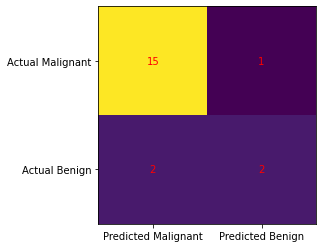

In [15]:
#Visualization
fig,ax=plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted Malignant","Predicted Benign"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual Malignant","Actual Benign"))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

# Classification Report for Logistic Regression

In [70]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.67      0.50      0.57         4

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84      0.85      0.84        20



In [71]:
#Applying K-fold Cross-Validation - to solve variance problem by calculating average of results
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.875 0.75  0.75  0.875 1.    0.875 0.875 0.75  1.    0.75 ]
0.85
0.09354143466934853


In [72]:
#Applying Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters=[{'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'random_state':[0]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
#n_jobs--> Number of cpu's that you want to use; value=-1--> refers to all available computing powers
grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameter=grid_search.best_params_
print("Best Accuracy:",best_accuracy)
print("Best Parameters:",best_parameter)         

Best Accuracy: 0.875
Best Parameters: {'random_state': 0, 'solver': 'liblinear'}


In [73]:
Difference=pd.DataFrame({"Actual:":y_test,"Predicted:":y_pred})
print(Difference.to_string())

    Actual:  Predicted:
0         0           0
1         0           0
2         0           0
3         0           0
4         0           1
5         0           0
6         0           0
7         1           1
8         0           0
9         0           0
10        0           0
11        0           0
12        0           0
13        0           0
14        1           0
15        0           0
16        1           1
17        0           0
18        1           0
19        0           0
